In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import distinctipy as dpy

from tqdm import tqdm
from sklearn.cluster import DBSCAN


In [3]:
dfs = {
    "250" : pd.read_csv("./tsne_alivhep_k250_test.csv"),
    "500" : pd.read_csv("./tsne_alivhep_k500_test.csv"),
    "1000" : pd.read_csv("./tsne_alivhep_k1000_test.csv"),
    "2500" : pd.read_csv("./tsne_alivhep_k2500_test.csv"),
    "5000" : pd.read_csv("./tsne_alivhep_k5000_test.csv"),
}

n_dfs = len(dfs)
tcolumns = columns = ["tsne0", "tsne1"]

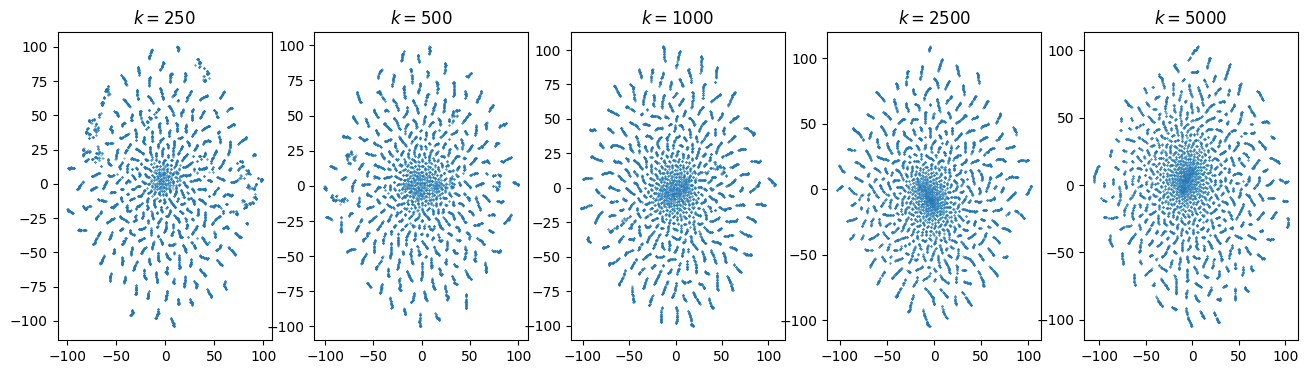

In [4]:
fig, axs = plt.subplots(1, n_dfs, figsize=(16,4))

def plot_tsnes(df, ax, name):
    ax.scatter(df[tcolumns[0]], df[tcolumns[1]], s=0.1)
    ax.set_title(f"$k={name}$")

for (name, df), ax in zip(dfs.items(), axs):
    plot_tsnes(df, ax, name)

plt.show()

In [6]:
def dbscan_cluster(df, columns, eps, min_samples):
    X = df[columns].values
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    return clustering.labels_

clusterings = {
    name : dbscan_cluster(dfs[name], tcolumns, 3, 5)
    for name in tqdm(dfs.keys(), desc="Clustering")
}

clusterings_ns = {
    name : len(set(clusterings[name]))
    for name in tqdm(dfs.keys(), desc="Counting")
}

cluster_colors = dpy.get_colors(max(clusterings_ns.values()), pastel_factor=0.8)

Counting: 100%|██████████| 5/5 [00:00<00:00, 2112.36it/s]


Plotting: 5it [00:00, 46.91it/s]
/tmp/ipykernel_28045/3887330198.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[-1].set_xticklabels([dfs.keys()])


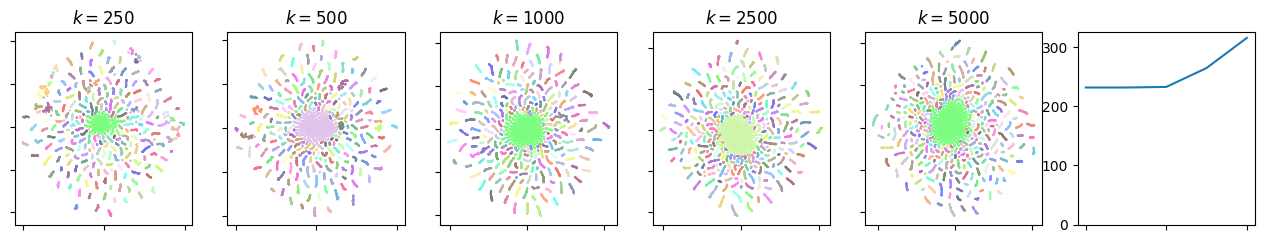

In [20]:

def plot_tsne_clustering(df, ax, name):
    columns = ["tsne0", "tsne1"]
    
    clustering = clusterings[name]
    c = np.array(cluster_colors)[clustering]
    
    ax.scatter(df[columns[0]], df[columns[1]], c=c, s=0.3)
    ax.set_title(f"$k={name}$")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.tick_params('x')

fig, axs = plt.subplots(1, n_dfs + 1, figsize=(16, 2.5))

for (name, df), ax in tqdm(zip(dfs.items(), axs), desc="Plotting"):
    plot_tsne_clustering(df, ax, name)

axs[-1].plot(clusterings_ns.values())
axs[-1].set_xticklabels([dfs.keys()])
axs[-1].set_ylim((0,max(clusterings_ns.values()) + 10))

plt.savefig("tsne_dbscan.png", dpi=400)